In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random
import itertools


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/SNA/roadNet-TX.txt"


In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'roadNet-TX.txt'],
 ['#', 'Texas', 'road', 'network'],
 ['#', 'Nodes:', '1379917', 'Edges:', '3843320'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '1'],
 ['0', '2'],
 ['0', '29'],
 ['1', '0'],
 ['1', '23'],
 ['1', '32'],
 ['2', '0'],
 ['2', '26'],
 ['2', '34'],
 ['29', '0'],
 ['29', '337'],
 ['29', '358'],
 ['23', '1'],
 ['23', '13'],
 ['23', '24'],
 ['32', '1'],
 ['26', '2'],
 ['26', '33'],
 ['34', '2'],
 ['34', '33'],
 ['34', '53'],
 ['3', '4'],
 ['3', '7'],
 ['3', '40'],
 ['4', '3'],
 ['4', '18'],
 ['4', '19'],
 ['7', '3'],
 ['7', '5'],
 ['7', '16'],
 ['7', '17'],
 ['40', '3'],
 ['40', '16'],
 ['40', '39'],
 ['40', '179'],
 ['18', '4'],
 ['18', '179'],
 ['19', '4'],
 ['19', '6'],
 ['19', '17'],
 ['5', '6'],
 ['5', '7'],
 ['5', '10'],
 ['6', '5'],
 ['6', '11'],
 ['6', '19'],
 ['10', '5'],
 ['10', '8'],
 ['10', '11'],
 ['11', '6'],
 ['11', '9'],
 ['11', '10'],
 ['16',

In [5]:
#taking 1000 random samples from the data
sample = random.sample(res, 1000)
filename=open('data22.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
sample

[['234016', '234015'],
 ['13174', '23874'],
 ['153572', '153593'],
 ['404876', '404881'],
 ['26255', '26258'],
 ['411174', '411183'],
 ['194278', '195029'],
 ['698065', '698064'],
 ['1259662', '1259660'],
 ['116961', '116969'],
 ['1153136', '1153137'],
 ['605436', '605437'],
 ['470418', '470417'],
 ['242083', '241959'],
 ['98427', '98426'],
 ['531234', '531226'],
 ['1307314', '1307315'],
 ['1154406', '1154402'],
 ['780783', '780781'],
 ['105565', '105566'],
 ['1082957', '1082989'],
 ['1043292', '1043291'],
 ['539696', '538543'],
 ['347032', '347030'],
 ['705154', '705155'],
 ['1169822', '1169823'],
 ['169076', '169078'],
 ['1368471', '1368462'],
 ['427280', '427279'],
 ['159078', '159071'],
 ['503096', '503124'],
 ['885045', '882310'],
 ['1302734', '1302776'],
 ['100160', '100156'],
 ['500718', '500719'],
 ['471907', '481702'],
 ['299476', '295419'],
 ['929182', '929193'],
 ['931759', '930541'],
 ['1240846', '1243797'],
 ['32713', '32716'],
 ['405119', '405477'],
 ['42732', '42737'],
 

In [7]:
G1=nx.read_edgelist('data22.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 1132
Number of edges: 566
Average in degree:   0.5000
Average out degree:   0.5000


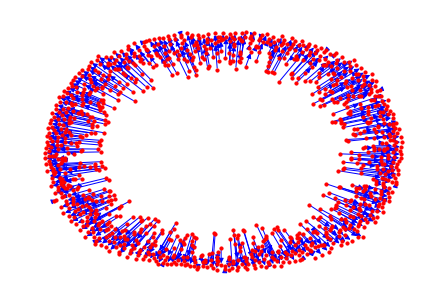

In [8]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

###Giant Component

In [9]:
strongly_connected_comp = nx.strongly_connected_components(G2)
Graph1 = max(strongly_connected_comp, key = len)
N = len(G2)


In [10]:
Ng = len(Graph1)

In [11]:
Ng

1351137

In [12]:
Ng/N

0.9791436731339639

###Girvan Newman Algorithm

In [13]:
def girvan_newman(G, most_valuable_edge=None):
# If the graph is already empty, then its connected components will be returned
  if G.number_of_edges() == 0:
    yield tuple(nx.connected_components(G))
    return
    #Use edge betweeness centrality if no function is given for computing most valuable edge
  if most_valuable_edge is None:
    def most_valuable_edge(G):
      betweenness = nx.edge_betweenness_centrality(G)
      return max(betweenness, key=betweenness.get)
  # The copy of G here must include the edge weight data.
  g = G.copy().to_undirected()
  g.remove_edges_from(nx.selfloop_edges(g))
  
  while g.number_of_edges() > 0:
    yield _without_most_central_edges(g, most_valuable_edge)



In [14]:
def _without_most_central_edges(G, most_valuable_edge):
  number_connected = nx.number_connected_components(G)
  new_comp = number_connected
  while new_comp <= number_connected:
    mvedge = most_valuable_edge(G)
    G.remove_edge(*mvedge)
    print("THE REMOVED EDGES ARE : ",end="")
    print(*mvedge)
    new_components = tuple(nx.connected_components(G))
    new_comp = len(new_components)
    return new_components


In [15]:
component_girvan = girvan_newman(G1)

In [16]:
print("Step 1:")
step1 = next(component_girvan)
for i in range(50):
  print(step1[i],end="")

Step 1:
THE REMOVED EDGES ARE : 234016 234015
{234016}{234015}{23874, 13174}{153593, 153572}{404881, 404876}{26258, 26255}{411174, 411183}{195029, 194278}{698064, 698065}{1259660, 1259662}{116961, 116969}{1153136, 1153137}{605436, 605437}{470417, 470418}{242083, 241959}{98426, 98427}{531234, 531226}{1307314, 1307315}{1154402, 1154406}{780781, 780783}{105565, 105566}{1082989, 1082957}{1043291, 1043292}{539696, 538543}{347032, 347030}{705154, 705155}{1169822, 1169823}{169076, 169078}{1368462, 1368471}{427280, 427279}{159078, 159071}{503096, 503124}{885045, 882310}{1302776, 1302734}{100160, 100156}{500718, 500719}{471907, 481702}{295419, 299476}{929193, 929182}{930541, 931759}{1243797, 1240846}{32713, 32716}{405477, 405119}{42737, 42732}{52508, 51823}{264321, 264323}{390601, 390605}{959517, 959527}{34728, 34730}{757971, 757972}

In [17]:
print("Number of Communities in Step 1 are: " + str(len(step1)))


Number of Communities in Step 1 are: 567


In [18]:
print("Step 2:")
step2 = next(component_girvan)
print("Number of Communities in Step 2 are: " + str(len(step2)))

Step 2:
THE REMOVED EDGES ARE : 13174 23874
Number of Communities in Step 2 are: 568


In [19]:
step2

({234016},
 {234015},
 {13174},
 {23874},
 {153572, 153593},
 {404876, 404881},
 {26255, 26258},
 {411174, 411183},
 {194278, 195029},
 {698064, 698065},
 {1259660, 1259662},
 {116961, 116969},
 {1153136, 1153137},
 {605436, 605437},
 {470417, 470418},
 {241959, 242083},
 {98426, 98427},
 {531226, 531234},
 {1307314, 1307315},
 {1154402, 1154406},
 {780781, 780783},
 {105565, 105566},
 {1082957, 1082989},
 {1043291, 1043292},
 {538543, 539696},
 {347030, 347032},
 {705154, 705155},
 {1169822, 1169823},
 {169076, 169078},
 {1368462, 1368471},
 {427279, 427280},
 {159071, 159078},
 {503096, 503124},
 {882310, 885045},
 {1302734, 1302776},
 {100156, 100160},
 {500718, 500719},
 {471907, 481702},
 {295419, 299476},
 {929182, 929193},
 {930541, 931759},
 {1240846, 1243797},
 {32713, 32716},
 {405119, 405477},
 {42732, 42737},
 {51823, 52508},
 {264321, 264323},
 {390601, 390605},
 {959517, 959527},
 {34728, 34730},
 {757971, 757972},
 {573022, 574016},
 {310955, 310957},
 {117484, 118148},


In [20]:
print("Step 3:")
step3 = next(component_girvan)
print("Number of Communities in Step 3 are: " + str(len(step3)))

Step 3:
THE REMOVED EDGES ARE : 153572 153593
Number of Communities in Step 3 are: 569


In [21]:
step3

({234016},
 {234015},
 {13174},
 {23874},
 {153572},
 {153593},
 {404876, 404881},
 {26255, 26258},
 {411174, 411183},
 {194278, 195029},
 {698064, 698065},
 {1259660, 1259662},
 {116961, 116969},
 {1153136, 1153137},
 {605436, 605437},
 {470417, 470418},
 {241959, 242083},
 {98426, 98427},
 {531226, 531234},
 {1307314, 1307315},
 {1154402, 1154406},
 {780781, 780783},
 {105565, 105566},
 {1082957, 1082989},
 {1043291, 1043292},
 {538543, 539696},
 {347030, 347032},
 {705154, 705155},
 {1169822, 1169823},
 {169076, 169078},
 {1368462, 1368471},
 {427279, 427280},
 {159071, 159078},
 {503096, 503124},
 {882310, 885045},
 {1302734, 1302776},
 {100156, 100160},
 {500718, 500719},
 {471907, 481702},
 {295419, 299476},
 {929182, 929193},
 {930541, 931759},
 {1240846, 1243797},
 {32713, 32716},
 {405119, 405477},
 {42732, 42737},
 {51823, 52508},
 {264321, 264323},
 {390601, 390605},
 {959517, 959527},
 {34728, 34730},
 {757971, 757972},
 {573022, 574016},
 {310955, 310957},
 {117484, 118148

In [22]:
print("Step 4:")
step4 = next(component_girvan)
print("Number of Communities in Step 4 are: " + str(len(step4)))

Step 4:
THE REMOVED EDGES ARE : 404876 404881
Number of Communities in Step 4 are: 570


In [23]:
step4


({234016},
 {234015},
 {13174},
 {23874},
 {153572},
 {153593},
 {404876},
 {404881},
 {26255, 26258},
 {411174, 411183},
 {194278, 195029},
 {698064, 698065},
 {1259660, 1259662},
 {116961, 116969},
 {1153136, 1153137},
 {605436, 605437},
 {470417, 470418},
 {241959, 242083},
 {98426, 98427},
 {531226, 531234},
 {1307314, 1307315},
 {1154402, 1154406},
 {780781, 780783},
 {105565, 105566},
 {1082957, 1082989},
 {1043291, 1043292},
 {538543, 539696},
 {347030, 347032},
 {705154, 705155},
 {1169822, 1169823},
 {169076, 169078},
 {1368462, 1368471},
 {427279, 427280},
 {159071, 159078},
 {503096, 503124},
 {882310, 885045},
 {1302734, 1302776},
 {100156, 100160},
 {500718, 500719},
 {471907, 481702},
 {295419, 299476},
 {929182, 929193},
 {930541, 931759},
 {1240846, 1243797},
 {32713, 32716},
 {405119, 405477},
 {42732, 42737},
 {51823, 52508},
 {264321, 264323},
 {390601, 390605},
 {959517, 959527},
 {34728, 34730},
 {757971, 757972},
 {573022, 574016},
 {310955, 310957},
 {117484, 118

In [24]:
print("Step 5:")
step5 = next(component_girvan)
print("Number of Communities in Step 5 are: " + str(len(step5)))

Step 5:
THE REMOVED EDGES ARE : 26255 26258
Number of Communities in Step 5 are: 571


In [25]:
step5

({234016},
 {234015},
 {13174},
 {23874},
 {153572},
 {153593},
 {404876},
 {404881},
 {26255},
 {26258},
 {411174, 411183},
 {194278, 195029},
 {698064, 698065},
 {1259660, 1259662},
 {116961, 116969},
 {1153136, 1153137},
 {605436, 605437},
 {470417, 470418},
 {241959, 242083},
 {98426, 98427},
 {531226, 531234},
 {1307314, 1307315},
 {1154402, 1154406},
 {780781, 780783},
 {105565, 105566},
 {1082957, 1082989},
 {1043291, 1043292},
 {538543, 539696},
 {347030, 347032},
 {705154, 705155},
 {1169822, 1169823},
 {169076, 169078},
 {1368462, 1368471},
 {427279, 427280},
 {159071, 159078},
 {503096, 503124},
 {882310, 885045},
 {1302734, 1302776},
 {100156, 100160},
 {500718, 500719},
 {471907, 481702},
 {295419, 299476},
 {929182, 929193},
 {930541, 931759},
 {1240846, 1243797},
 {32713, 32716},
 {405119, 405477},
 {42732, 42737},
 {51823, 52508},
 {264321, 264323},
 {390601, 390605},
 {959517, 959527},
 {34728, 34730},
 {757971, 757972},
 {573022, 574016},
 {310955, 310957},
 {117484, 

###Ravasz Algorithm

In [26]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

In [27]:
Gu=G1.to_undirected()

In [28]:
def create_hc(G, t):
    labels=list(G.nodes())    #node labels
    path_length=[n for n in nx.all_pairs_shortest_path_length(Gu)]
    #the distance matrix D
    dist_mat=np.zeros((len(G),len(G))) 
    G1_list=list(G.nodes())   
    for u,p in path_length:
        for v,dis in p.items():
            dist_mat[G1_list.index(u)][G1_list.index(v)] = dis
            dist_mat[G1_list.index(v)][G1_list.index(u)] = dis
            if u==v:
                dist_mat[G1_list.index(u)][G1_list.index(u)]=0

    # Creating hierarchical cluster (HC)
    # Creating the HCs using the complete/max/farthest point linkage 
    Y = distance.squareform(dist_mat) ## the upper triangular of the distance matrix 
    Z = hierarchy.average(Y)
    
    #For illustrive purposes, partition selection (t) is arbitrary
    membership=list(hierarchy.fcluster(Z,t=t))
    # Creating collection of lists for blockmodel
    part = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        part[p].append(labels[n])
        
    return Z, membership, part

In [29]:
Z, membership, part = create_hc(Gu, t=1.5) 
part.items()

dict_items([(1, [234016, 234015, 13174, 23874, 153572, 153593, 404876, 404881, 26255, 26258, 411174, 411183, 194278, 195029, 698065, 698064, 1259662, 1259660, 116961, 116969, 1153136, 1153137, 605436, 605437, 470418, 470417, 242083, 241959, 98427, 98426, 531234, 531226, 1307314, 1307315, 1154406, 1154402, 780783, 780781, 105565, 105566, 1082957, 1082989, 1043292, 1043291, 539696, 538543, 347032, 347030, 705154, 705155, 1169822, 1169823, 169076, 169078, 1368471, 1368462, 427280, 427279, 159078, 159071, 503096, 503124, 885045, 882310, 1302734, 1302776, 100160, 100156, 500718, 500719, 471907, 481702, 299476, 295419, 929182, 929193, 931759, 930541, 1240846, 1243797, 32713, 32716, 405119, 405477, 42732, 42737, 52508, 51823, 264323, 264321, 390605, 390601, 959517, 959527, 34728, 34730, 757971, 757972, 574016, 573022, 310955, 310957, 118148, 117484, 778612, 778611, 1125301, 1125297, 260400, 260396, 552576, 553378, 189415, 189416, 361139, 361137, 1221638, 1222053, 1275168, 1275165, 1309366, 13

In [30]:
part = {}
i = 0
for i in range(len(membership)):
    part[i]=membership[i]

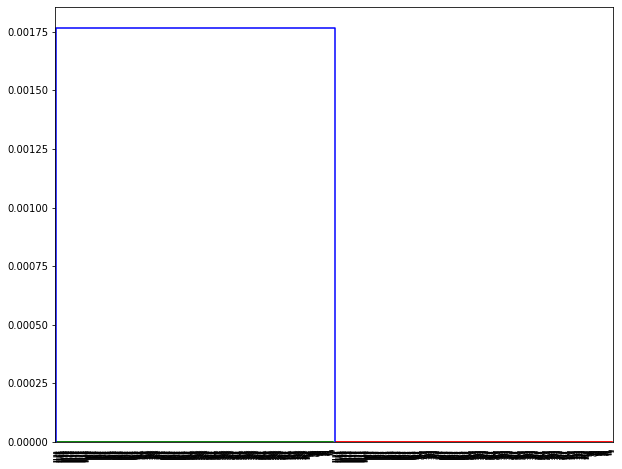

In [31]:
plt.figure(figsize=(10,8))
hierarchy.dendrogram(Z)
plt.show()

In [32]:
#number of communities
len(set(part.values()))

1